# CS 316 : Introduction to Deep Learning
## Lab 9 : RNNs & LSTM & GRU & CONV1D
### Dr. Abdul Samad

# Setup

In [ ]:
# DO NOT EDIT
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

# Overview

In this lab, you will create four models and train them using full word encoding on the [IMDB Reviews dataset](https://www.tensorflow.org/datasets/catalog/imdb_reviews) . Following the embedding layer, these models employ various layers such as 'Flatten,' 'LSTM,' 'GRU,' and 'Conv1D.' You will compare their performance and determine which model is best for this specific dataset. Let's begin!

# [10 Points] Task 01 -  Download the Dataset
In this task, you will download the `plain_text` version of the `IMDB Reviews` dataset and split it into `train` and `test` for training the model.


In [ ]:
# Download the plain text dataset using TensorFlow Datasets (tfds)
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# TODO: Separate the training and test data from the 'imdb' dictionary
train_data, test_data =

# Initialize empty lists to store sentences and labels for training and testing
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

# TODO: Loop over all training examples and save the sentences and labels
for s, l in train_data:
    # Decode the sentence from bytes to utf8 and append to the training_sentences list

    # Append the label to the training_labels list


# TODO: Loop over all test examples and save the sentences and labels
for s, l in test_data:
    # Decode the sentence from bytes to utf8 and append to the testing_sentences list

    # Append the label to the testing_labels list


# TODO: Convert the labels lists to numpy arrays for both training and testing
training_labels_final =
testing_labels_final =


# [10 Points] Task 02 -  Prepare the Dataset
After downloading the `plain_text` version, you will build the vocabulary from
scratch and generate padded sequences using the `Tokenizer` class and `pad_sequences()` method

---
[Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [ ]:
# Set parameters for tokenization
vocab_size = 10000
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

# TODO: Initialize the Tokenizer class
# Use Tokenizer Class to create a tokenizer, where num_words is equal to vocab_size
# Also use oov_tok for new words
tokenizer =

# TODO: Generate the word index dictionary for the training sentences
# Use fit_on_texts method on training sentences to build the vocabulary

word_index = tokenizer.word_index

# TODO: Generate and pad the training sequences
# Use texts_to_sequences to convert training sentences to sequences
# Pad sequences with maxlen=max_length and keep truncating=trunc_type
sequences =
padded =

# TODO: Generate and pad the test sequences
# Use texts_to_sequences to convert testing sentences to sequences
# Pad sequences with maxlen=max_length
testing_sequences =
testing_padded =


# Plot Utility

Before defining the models, define the function below to easily visualise the accuracy and loss history after training.

In [ ]:
# DO NOT EDIT
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# [20 Points] Task 03 -  Flatten Layer

The first model uses the `Flatten` layer after the embedding layer. Its main advantage is that it is very quick to train.

---

[Embedding Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [ ]:
# Parameters
embedding_dim = 16
dense_dim = 6
# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    # TODO: Add an embedding layer with vocab_size, embedding_dim, and input_length=max_length


    # TODO: Flatten the embedded representation


    # TODO: Add a Dense layer with dense_dim neurons and 'relu' activation function


    # TODO: Output layer with 1 neuron and 'sigmoid' activation for binary classification

])

# Print the model summary
model_flatten.summary()

# TODO: Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_20 (Dense)            (None, 6)                 11526     
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Parameters
NUM_EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

# TODO: Train the model on padded training sequences
# Use fit method on the model with padded input sequences (padded) and corresponding labels (training_labels_final)
# Specify batch_size, epochs, and validation_split parameters
history_flatten =


Epoch 1/10
157/157 [==============================] - 20s 117ms/step - loss: 0.6565 - accuracy: 0.6191 - val_loss: 0.5022 - val_accuracy: 0.7910
Epoch 2/10
157/157 [==============================] - 10s 63ms/step - loss: 0.3593 - accuracy: 0.8532 - val_loss: 0.3570 - val_accuracy: 0.8442
Epoch 3/10
157/157 [==============================] - 5s 35ms/step - loss: 0.2192 - accuracy: 0.9208 - val_loss: 0.3618 - val_accuracy: 0.8442
Epoch 4/10
157/157 [==============================] - 5s 31ms/step - loss: 0.1286 - accuracy: 0.9643 - val_loss: 0.3846 - val_accuracy: 0.8446
Epoch 5/10
157/157 [==============================] - 4s 23ms/step - loss: 0.0641 - accuracy: 0.9904 - val_loss: 0.4257 - val_accuracy: 0.8438
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.0308 - accuracy: 0.9975 - val_loss: 0.4675 - val_accuracy: 0.8380
Epoch 7/10
157/157 [==============================] - 2s 15ms/step - loss: 0.0151 - accuracy: 0.9993 - val_loss: 0.5066 - val_accuracy: 0.8

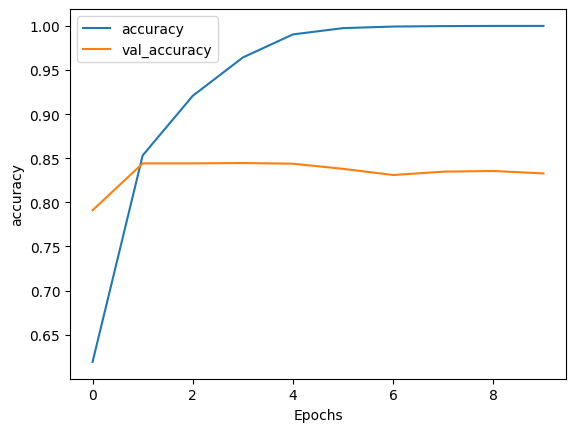

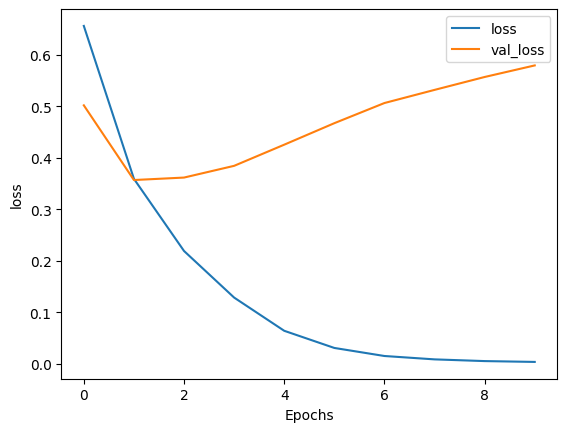

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

# [20 Points] Task 04 -  LSTM

The second model uses an `LSTM` layer followed by the Embedding layer. This is slower to train but useful in applications where the order of the tokens is important.

---
[LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)

[Bidirectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)

In [ ]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# TODO: Define the model with LSTM
model_lstm = tf.keras.Sequential([
    # TODO: Add embedding layer with vocab_size, embedding_dim, input_length=max_length

    # TODO: Add a Bidirectional LSTM layer with the number of units equal to lstm_dim

    # TODO: Add a Dense layer with dense_dim units and 'relu' activation function

    # TODO: Add the output Dense layer with 1 unit and 'sigmoid' activation function

])

# TODO: Compile the model with binary_crossentropy loss, adam optimizer, and accuracy metric


# TODO: Print the model summary to review the architecture



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 6)                 390       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Parameters
NUM_EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

# TODO: Train the model on padded training sequences
# Use fit method on the model with padded input sequences (padded) and corresponding labels (training_labels_final)
# Specify batch_size, epochs, and validation_split parameters
history_lstm =


Epoch 1/10
157/157 [==============================] - 21s 111ms/step - loss: 0.5951 - accuracy: 0.6653 - val_loss: 0.4416 - val_accuracy: 0.8118
Epoch 2/10
157/157 [==============================] - 8s 51ms/step - loss: 0.3283 - accuracy: 0.8652 - val_loss: 0.3654 - val_accuracy: 0.8440
Epoch 3/10
157/157 [==============================] - 5s 35ms/step - loss: 0.2370 - accuracy: 0.9099 - val_loss: 0.3654 - val_accuracy: 0.8494
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1867 - accuracy: 0.9339 - val_loss: 0.4571 - val_accuracy: 0.8376
Epoch 5/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1427 - accuracy: 0.9510 - val_loss: 0.4496 - val_accuracy: 0.8338
Epoch 6/10
157/157 [==============================] - 5s 35ms/step - loss: 0.1108 - accuracy: 0.9652 - val_loss: 0.5655 - val_accuracy: 0.8288
Epoch 7/10
157/157 [==============================] - 3s 17ms/step - loss: 0.0972 - accuracy: 0.9702 - val_loss: 0.6926 - val_accuracy: 0.82

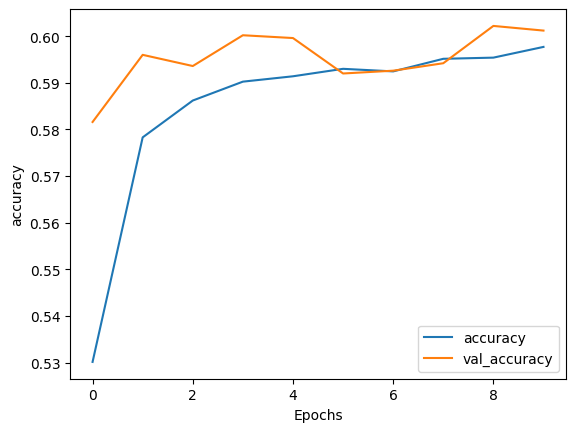

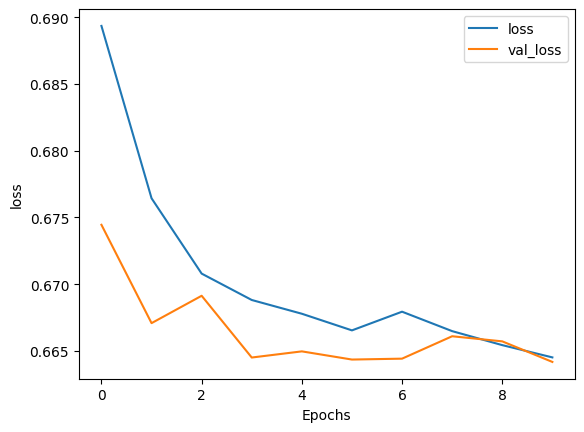

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# [20 Points] Task 05 -  GRU
The third model uses an `GRU` followed by the embedding layer.
The *Gated Recurrent Unit* or [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy. You will notice in the model summary that it is a bit smaller than the LSTM and it also trains faster by a few seconds.

In [ ]:
# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    # TODO: Add an embedding layer with vocab_size, embedding_dim, and input_length=max_length


    # TODO: Add a Bidirectional GRU layer with gru_dim units


    # TODO: Add a Dense layer with dense_dim neurons and 'relu' activation function


    # Output layer with 1 neuron and 'sigmoid' activation for binary classification

])


# TODO: Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric


# TODO: Print the model summary to review the architecture



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 120, 16)           160000    
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 6)                 390       
                                                                 
 dense_25 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Parameters
NUM_EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

# TODO: Train the model on padded training sequences
# Use fit method on the model with padded input sequences (padded) and corresponding labels (training_labels_final)
# Specify batch_size, epochs, and validation_split parameters
history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)


Epoch 1/10
157/157 [==============================] - 19s 99ms/step - loss: 0.6867 - accuracy: 0.5249 - val_loss: 0.6018 - val_accuracy: 0.7122
Epoch 2/10
157/157 [==============================] - 8s 50ms/step - loss: 0.4778 - accuracy: 0.7863 - val_loss: 0.4525 - val_accuracy: 0.8060
Epoch 3/10
157/157 [==============================] - 7s 43ms/step - loss: 0.3112 - accuracy: 0.8750 - val_loss: 0.3779 - val_accuracy: 0.8342
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2360 - accuracy: 0.9126 - val_loss: 0.3810 - val_accuracy: 0.8340
Epoch 5/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1853 - accuracy: 0.9351 - val_loss: 0.4358 - val_accuracy: 0.8334
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1384 - accuracy: 0.9541 - val_loss: 0.4987 - val_accuracy: 0.8222
Epoch 7/10
157/157 [==============================] - 4s 23ms/step - loss: 0.1057 - accuracy: 0.9661 - val_loss: 0.5648 - val_accuracy: 0.815

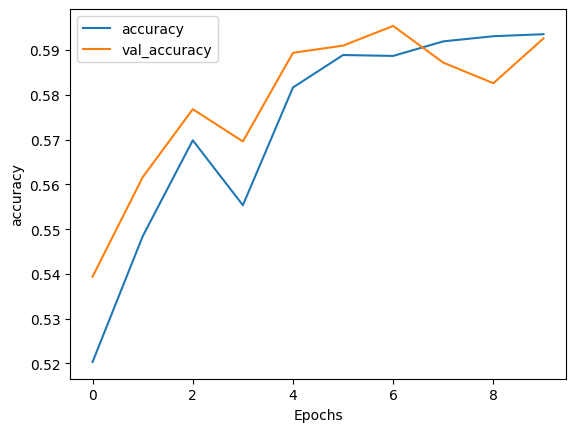

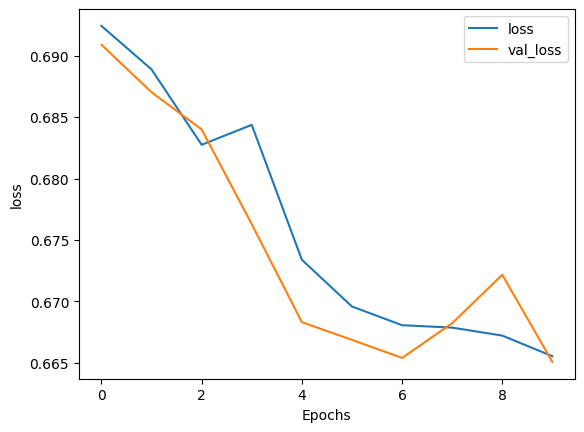

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

# [20 Points] Task 06 -  Convolution

The fourth model uses a convolution layer to extract features from your dataset. You will append a [GlobalAveragePooling1d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) layer to reduce the results before passing it on to the dense layers. Like the model with `Flatten`, this also trains much faster than the ones using RNN layers like `LSTM` and `GRU`.

---
[Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/)

In [ ]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6


# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    # TODO: Add an embedding layer with vocab_size, embedding_dim, and input_length=max_length


    # TODO: Add a Conv1D layer with filters, kernel_size, and activation='relu'


    # TODO: Add a GlobalAveragePooling1D layer to reduce the spatial dimensions


    # TODO: Add a Dense layer with dense_dim neurons and 'relu' activation function


    # Output layer with 1 neuron and 'sigmoid' activation for binary classification

])

# Set the training parameters
# TODO: Compile the model with binary crossentropy loss, Adam optimizer, and accuracy metric


# TODO: Print the model summary to review the architecture



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 128)          2048      
                                                                 
 conv1d_3 (Conv1D)           (None, 116, 128)          82048     
                                                                 
 global_average_pooling1d_3  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_18 (Dense)            (None, 6)                 774       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 84877 (331.55 KB)
Trainable params: 84877 (331.55 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Parameters
NUM_EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

# TODO: Train the model on padded training sequences
# Use fit method on the model with padded input sequences (padded) and corresponding labels (training_labels_final)
# Specify batch_size, epochs, and validation_split parameters
history_conv =


Epoch 1/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6672 - accuracy: 0.5921 - val_loss: 0.6653 - val_accuracy: 0.5890
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 0.6663 - accuracy: 0.5955 - val_loss: 0.6654 - val_accuracy: 0.5916
Epoch 3/10
157/157 [==============================] - 2s 13ms/step - loss: 0.6668 - accuracy: 0.5939 - val_loss: 0.6659 - val_accuracy: 0.5916
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.6659 - accuracy: 0.5946 - val_loss: 0.6638 - val_accuracy: 0.5946
Epoch 5/10
157/157 [==============================] - 1s 7ms/step - loss: 0.6661 - accuracy: 0.5965 - val_loss: 0.6637 - val_accuracy: 0.5926
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.6659 - accuracy: 0.5935 - val_loss: 0.6657 - val_accuracy: 0.5908
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.6660 - accuracy: 0.5917 - val_loss: 0.6649 - val_accuracy: 0.5938
Epo

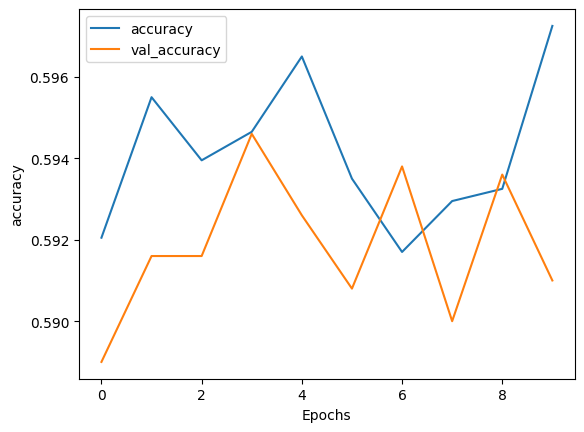

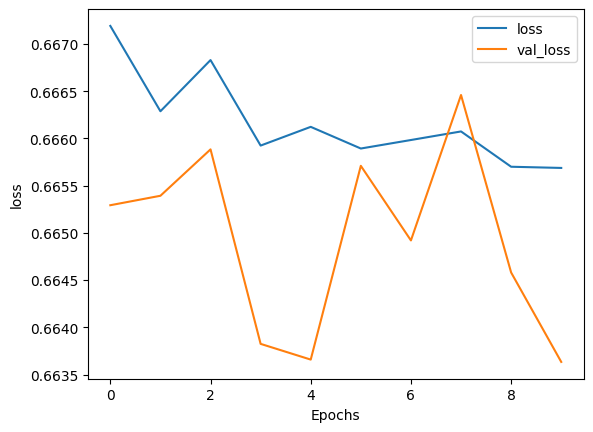

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')